# **Reconnaissance de la langue des signes**

Beaucoup de progrès et de recherches en IA ont été faites pour aider les personnes sourdes et muettes. L'apprentissage profond et la vision par ordinateur peuvent également être utilisés pour avoir un impact sur cette cause.

Cela peut être très utile pour les personnes sourdes et muettes dans la communication avec les autres car la connaissance de la langue des signes n'est pas quelque chose qui est commun à tous, de plus, cela peut être étendu à la création des éditeurs automatiques, où la personne peut facilement écrire par ses simples gestes 

## <u> Objectifs du projet : <u/>
    
- Création du jeu de données (chaque signe est associé à une lettre)
- Entrainez votre modèle sur le jeu de donnée
- Testez votre modèle sur des images afin de construire des mots ou des phrases
- Testez en temps réel avec une Webcam

![image](alphabetsigné.jpg)

# LANGUE DES SIGNES 

Tout comme les autres langues auxquelles nous sommes plus habitués, la langue des signes n’est pas universelle. Ainsi, les alphabets dactylologiques belge, néerlandais, suisse, allemand, danois, suédois, italien, espagnol, portugais, argentin, brésilien n’utilisent qu’une seule main pour épeler un mot. En effet, ils ont tous la même racine : l’alphabet des sourds français utilisé au 18e siècle. À contrario, les alphabets anglais, australien, irlandais, yougoslave font appel aux deux mains.

Comme une langue orale, la langue des signes s’est créée grâce à des signes arbitraires (comme nos propres mots arbitraires) afin qu’ils puissent se comprendre. Par exemple, certains mots se signent avec la forme des doigts qui imite la première lettre du mot en dactylologie ; la couleur « rose » se dit en formant la lettre « R » avec la main et en passant la main sous le menton. Certains signes de base, comme manger, boire ou laver, sont néanmoins identiques, ce qui est compréhensible. Ainsi, des sourds de pays différents et avec une langue des signes différente se comprennent presque totalement au bout de deux heures de discussion environ, quel que soit le niveau de difficulté du sujet de discussion

La grammaire de la LSF

Il existe des signes qui préfigurent une expression idiomatique du français et traduisent une phrase entière en un seul geste.

    Les temps du verbe n’existent pas, en LSF, on précise seulement le moment où se déroule l’action (avant ou hier pour le passé, aujourd’hui pour le présent, après ou demain pour le futur). Mais le temps est donné par la position du corps et en particulier de l’épaule de la main maîtresse. Le positionnement des signes par rapport au corps (plus ou moins éloignés) donne aussi l’idée du temps (passé, présent, futur).
    La date exacte est ensuite posée par le signeur si nécessaire (il y a deux ans, hier, tout à l’heure, demain, dans un mois, etc.). L’ordre des signes est inversé. Le verbe se met généralement en fin de phrase. En premier, on met toujours les compléments circonstanciels de temps, de lieu. C’est une logique très visuelle. Enfin, comme nous l’avons déjà mentionné, le corps et les mimiques du visage sont très importants et renseignent l’interlocuteur sur le type de phrase.
    L’alphabet dactylographique consiste à représenter chaque lettre de l’alphabet par une position définie des doigts de la main (droite pour les droitiers et gauche pour les gauchers). Cet alphabet ne sert qu’à épeler des mots inconnus (noms de villes, prénoms, etc.). Le prénom des personnes est toujours épelé avec la dactylologie (l’alphabet de sourds que l’on signe avec la main). Mais en fait, en entrant dans une communauté sourde, il est d’usage de recevoir un surnom, un prénom qui se fait en un seul geste. Ce nouveau nom s’attribue généralement en fonction d’une caractéristique morale ou physique qui semble la plus importante !

# 1. Jeu de données

* A- Création d'un dataset : 

La première étape de notre projet consiste à photographier chacun des 26 signes de l'aphabet, plus une catégorie inconnue en photo. Pour cela, l'utilisation d'un mode rafale s'avère pratique. Nous choisissons de télécharger le modue Autowebcam .

     - Téléchargement de AutoWebcam pour la prise de photos en mode rafale.

https://www.commentcamarche.net/download/telecharger-34084780-autowebcam

    - stockage des photos => C:\Program Files (x86)\AutoWebCam\Images

* B- Labellisation des photos

 partir du tuto :
https://github.com/tzutalin/labelImg

- télécharger le githup sur ordi et suivre le read me
- suivre les installations pour windows
- se placer sur le dossier source (labelImg-master)dans l'invite de commande et saisir dans le répertoire : 
    - labelImg-master
    - pyrcc5 -o libs/resources.py resources.qrc
    - python labelImg.py
    
    

### exemple de labelling pour la lettre L

In [4]:
![exemplelabelling.PNG](exemplelabelling.PNG)
from IPython.display import IFrame, display
filepath = "exemplelabelling.PNG"
IFrame(filepath, width=900, height=200)

'[exemplelabelling.PNG]' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


## 2. Mise en place du jeu de données

 Nous partons d'un jeu de données trouvé internet pour les raisons expliquées oralement. 
 Toutes nos photos sont dans le répertoire ```lettres```(data_path) et seront dispachées dans les répertoires ```test```  et  ```train```

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import warnings
import numpy as np
import os
import cv2
import re
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import itertools

In [2]:
from shutil import copy
from time import sleep

In [3]:
#Chargement des données
data_path = r'C:\Users\utilisateur\Google Drive\microsoft_ia\Google Drive\projets\ia\Reconnaissance des signes test -officiel\lettres'

test = r'C:\Users\utilisateur\Google Drive\microsoft_ia\Google Drive\projets\ia\Reconnaissance des signes test -officiel\test'
train = r'C:\Users\utilisateur\Google Drive\microsoft_ia\Google Drive\projets\ia\Reconnaissance des signes test -officiel\train'

    

In [7]:
# Afficher le nombre de photos dans le répertoire
#os.listdir() pour obtenir tout ce qui est dans un répertoire - fichiers et répertoires.
for lettre in os.listdir(data_path):
    path = data_path + "\\" + lettre#lettre correspond à un répertoire
    print(lettre, len(os.listdir(path)))


a 1500
b 1500
c 1500
d 1500
e 1500
f 1500
g 1500
h 1500
i 1500
j 1500
k 1500
l 1500
m 1500
n 1500
o 1500
p 1500
q 1500
r 1500
s 1500
t 1500
u 1500
unknown 1500
v 1500
w 1500
x 1500
y 1500
z 1500


In [8]:
#selectionner 80% des photos pour le jeu d'entrainement
for lettre in os.listdir(data_path):
    path = data_path + "\\" + lettre
    taille = len(os.listdir(path))
    sequence = round(0.8*taille)
    print(lettre, sequence)

a 1200
b 1200
c 1200
d 1200
e 1200
f 1200
g 1200
h 1200
i 1200
j 1200
k 1200
l 1200
m 1200
n 1200
o 1200
p 1200
q 1200
r 1200
s 1200
t 1200
u 1200
unknown 1200
v 1200
w 1200
x 1200
y 1200
z 1200


In [10]:
#insérer 80% des images du fichier lettres dans le dossier train et 20% dans le dossier test
for lettre in os.listdir(data_path):
    path = data_path + "\\" + lettre
    taille = len(os.listdir(path))
    sequence = round(0.8 * taille)#arrondir les nombres ici 1200
    #on va dans chaque repertoire a, b... on lit les images
    train_path = train + "\\" + lettre
    test_path = test + "\\" + lettre
    for img in os.listdir(path):
        #extraction des chiffres dans le libellé
        image =  re.findall(r'\d+', img)
        #variable pour le path de l'image
        image_path = path + "\\" + img 
        if int(image[0])<sequence:
            copy(image_path,train_path)
        else :
            copy(image_path,test_path)
  

# Mise en place du CNN

Nous chargeons les données via ```ImageDataGenerator``` à travers lequel nous pouvons utiliser la fonction ```flow_from_directory``` pour charger les données du train et de l'ensemble de test, et chacun des noms des dossiers numériques sera le nom de classe des images chargées

Dans les tâches d'apprentissage en profondeur, beaucoup de données sont nécessaires pour entraîner le modèle lorsque l'ensemble de données n'est pas assez grand, l'augmentation des données doit être appliquée.
La classe ImageDataGenerator dans Keras est utilisée pour implémenter l'augmentation d'image en  implémentant la rotation d'image, le décalage, le redimensionnement,.. Le principal avantage de la classe Keras ImageDataGenerator est sa capacité à produire une augmentation d'image en temps réel. Cela signifie simplement qu'il peut générer des images augmentées de manière dynamique pendant la formation du modèle, ce qui rend le mode global plus robuste et précis.
Nous chargeons les données via ImageDataGenerator à travers lequel nous pouvons utiliser la fonction flow_from_directory pour charger les données du train et de l'ensemble de test, et chacun des noms des dossiers numériques sera le nom de classe des images chargées.

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train, target_size=(64,64), class_mode='categorical', batch_size=10,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)

Found 32373 images belonging to 27 classes.
Found 8127 images belonging to 27 classes.


**directory** : chaîne, chemin vers le répertoire à partir duquel lire les images
ex dans le train_batches :
train

**target_size** :tuple d'entiers (height, width), par défaut: (256, 256). Les dimensions auxquelles toutes les images trouvées seront redimensionnées.
nous choisissons 64X64

**class_mode**: l'un parmi "binary", "categorical", "input", "multi_output", "raw", sparse "ou None. Par défaut:" categorical ". Mode de production des cibles: - "binary": 1D numpy array of binary labels, - **"categorical": tableau numpy 2D d'étiquettes encodées à chaud. Prend en charge la sortie multi-étiquettes.** - "input": images identiques aux images d'entrée (principalement utilisées pour travailler avec les auto-encodeurs), - "multi_output": liste avec les valeurs des différentes colonnes, - "raw": tableau numpy de valeurs dans la y_col(les) colonne (s), - "sparse": tableau numpy 1D d'étiquettes d'entiers, - None, aucune cible n'est renvoyée (le générateur ne donnera que des lots de données d'image, ce qui est utile à utiliser dans model.predict()).
Nous choisissons catégorical

**batch_size** : taille des lots de données (par défaut: 32).
nous choisissons 10

**shuffle** : s'il faut mélanger les données (par défaut: True)
nous choisissons oui

### Structure du répertoire

Nous avons bien nos 40 500 images réparties dans 2 répertoires :
- un train avec 32 373 images 
- un test avec 8127 images  


et 27  classes qui correspondent aux différentes lettres de l'alphabet et la catégorie inconnue.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

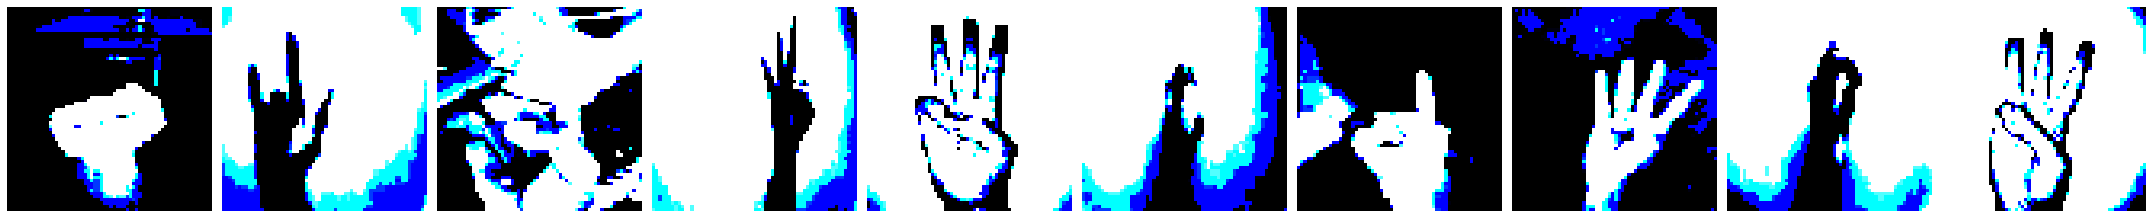

(10, 64, 64, 3)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0.]]


In [9]:
imgs, labels = next(train_batches)
#Plotting the images...
def plotImages(images_arr):
    #affichage de 10 photos de taille 30*20
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    #ajuste automatiquement les paramètres de sous-tracé afin que le (s) sous- tracé s'insère dans la zone de la figure.
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(imgs.shape)
print(labels)

### Création du CNN



modèles de programmation puissants permettant notamment la reconnaissance d’images en attribuant automatiquement à chaque image fournie en entrée, une étiquette correspondant à sa classe d’appartenance.(on classe chaque image dans sa catégorie respective).

Leur mode de fonctionnement est à première vue simple : l’utilisateur fournit en entrée une image sous la forme d’une matrice de pixels.

Celle-ci dispose de 3 dimensions : (64x64x3)

- Deux dimensions pour une image en niveaux de gris.
- Une troisième dimension, de profondeur 3 pour représenter les couleurs fondamentales (Rouge, Vert, Bleu).

**convolution** : La couche de convolution est le bloc de base pour construire un CNN. Il s'agit de neurones qui vont recevoir et traiter l'image par petits bouts ce qui va permettre de rétrécir progressivement la taille de l'image.

On ajoute chaque couche à notre modèle en faisant model.add(la couche)

Il est important de comprendre que, là où nous voyons une image, un ordinateur ne voit qu'un tableau de chiffres. Ces chiffres sont la valeur des pixels et sont différents en fonction de la couleur et de l'intensité. Connaissant cela, nous allons pouvoir appliquer la convolution sur ces chiffres.

Ce ne sont plus des blocs que l'on va aligner, mais ce seront des images. Nous allons aligner la valeur des pixels d'une image avec un filtre de convolution.

Au premier plan, nous avons l'image constituée de ses pixels. Le filtre de convolution se trouve au second plan. C'est l'image de dimension 3 par 3, 3 pixels multipliés par 3 pixels. Ce filtre est nommé aussi kernel. Chaque case du filtre possède une valeur. Nous allons multiplier la valeur de chaque case du filtre par la valeur du pixel correspondant.

**pooling** : a pour but d'extraire les éléments saillants importants d'une image, sans se préoccuper des détails. Nous savons qu'une image est constituée de pixels. Comme pour l'opération de convolution, le pooling est effectué à l'aide d'une fenêtre glissante que l'on applique sur une image. Cette fenêtre délimitant la zone de calcul, est nommée « fenêtre de pooling ». La fenêtre de pooling réalise une opération élémentaire. Elle extrait la plus grande valeur de la zone analysée, ensuite, on glisse la fenêtre de pooling vers la droite, et on renouvelle l'opération. Ainsi de suite, jusqu'à traiter toute l'image. Ici nous patons sur le max pooling.

Le **dropout** consiste à éteindre des neurones ainsi que toutes leurs connexions. Cette opération dropout n'est effectuée que durant l'apprentissage. Quel est l'intérêt du dropout ? Au cours de l'apprentissage, le dropout évite aux neurones de se surspécialiser. Le dropout est un défi lancé au réseau à convolution durant l'apprentissage. Le dropout force le réseau à apprendre correctement et évite que quelques neurones ne prédominent


In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(27,activation ="softmax"))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

###  Ajustement (fit) et enregistrement(save) du modèle pour l'utiliser lors de la détection video.


Les callbacks sont des méthodes de keras qui vont nous faire gagner du temps. On les met dans une liste et l'on passera cette liste à la méthode d'apprentissage fit() lorsqu'on entraînera le modèle.


- Le Early Stopping est un callback qui va stopper l'apprentissage afin d'éviter le suraprentissage.

- Le Reduce LR on Plateau va réduire le learning rate lorsque la val_accuracy atteint un plateau afin que le modèle continue à apprendre des features interessantes :



Lors de la formation denotre modèle, nous utiliserons ```ReduceLRonplateau``` and ```earlystopping```. Les 2 callbacks dépendent de la ```val_loss```

Après chaque epoch, l'accuracy(précision) et la loss (perte)sont calculées à l'aide de l'ensemble des données de validation.
Si ```val_loss``` ne diminue pas, le LR du modèle est réduit à l'aide de la ```reduce_lr``` pour empêcher le modèle de dépasser les minima de perte et nous utilisons également ```EarlyStopping``` algorithm de sorte que si la ```validatiion accurany``` continue de diminuer pendant certaines epochs, l'apprentissage est arrêté.

L'exemple contient les callbacks utilisés, ainsi que les deux algorithmes d'optimisation différents utilisés - ```SGD``` (descente de gradient stochastique, ce qui signifie que les poids sont mis à jour à chaque instance d'entraînement) et ```Adam``` est utilisé.





Lorsque le modèle est crée, on indique que l'on ne souhaite plus toucher à son architecture via la méthode compile et les 3 paramètres : loss, optimizer et metric.

Loss : correspond à la fonction coût, c'est l'erreur de notre modèle. Plus il prédit la bonne émotion par rapport à l'image qu'il reçoit, plus le loss sera faible. L'objetif de l'apprentissage d'un modèle est de minimiser la fonction coût.

Pour ce paramètre, on va choisir categorical_crossentropycar on a plusieurs labels ("catégories") et nous souhaitons que le modèle attribue le score de probabilité le plus élevé possible au bon label.(pour 2 catégories, nous aurions utilisé binaire)

Optimizer : l'optimiseur est une implémentation d'un algorithme d'apprentissage. Nous allons utiliser Adam, un algorithme dit de descente de gradient. Il faut comprendre que l'on va descendre la courbe de la fonction coût/loss en approchant le réglage optimal pour chaque paramètre de nos neurones. Le réglage optimal est celui où la dérivée de la fonction coût par rapport aux paramètres est nulle, c'est son point le plus bas :

metrics: on va suivre un métrique de précision afin d'avoir une visibilité sur les performances de notre modèle à chaque tour d'apprentissage.


In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

Après avoir compilé le modèle (```compile```), nous l'ajustons (```fit```) sur les ```train_batches``` pour XX epochs(peut varier selon le choix des paramètres), en utilisant les ```callbacks``` décrits ci-dessus.

 Après plusieurs tentatives , les paramètres suivants sont choisis

In [11]:
history = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)

Epoch 1/10
3238/3238 [==============================] - 269s 83ms/step - loss: 1.9555 - accuracy: 0.4692 - val_loss: 1.6249 - val_accuracy: 0.6114
Epoch 2/10
3238/3238 [==============================] - 235s 73ms/step - loss: 0.5276 - accuracy: 0.8429 - val_loss: 1.4822 - val_accuracy: 0.6867
Epoch 3/10
3238/3238 [==============================] - 245s 76ms/step - loss: 0.3132 - accuracy: 0.9076 - val_loss: 1.4566 - val_accuracy: 0.7330
Epoch 4/10
3238/3238 [==============================] - 259s 80ms/step - loss: 0.2160 - accuracy: 0.9371 - val_loss: 1.3684 - val_accuracy: 0.7562
Epoch 5/10
3238/3238 [==============================] - 245s 76ms/step - loss: 0.1554 - accuracy: 0.9541 - val_loss: 1.4693 - val_accuracy: 0.7704
Epoch 6/10
3238/3238 [==============================] - 243s 75ms/step - loss: 0.0896 - accuracy: 0.9748 - val_loss: 1.4116 - val_accuracy: 0.7866


In [12]:
history.history

{'loss': [1.23823082447052,
  0.4724867343902588,
  0.30097973346710205,
  0.2122175097465515,
  0.1516733467578888,
  0.0822579488158226],
 'accuracy': [0.6516850590705872,
  0.8576282858848572,
  0.9117165803909302,
  0.93670654296875,
  0.9546226859092712,
  0.9762147665023804],
 'val_loss': [1.624861240386963,
  1.4821877479553223,
  1.456647276878357,
  1.3683632612228394,
  1.4692585468292236,
  1.4115650653839111],
 'val_accuracy': [0.6114187240600586,
  0.6867232918739319,
  0.7329887747764587,
  0.7562445998191833,
  0.7703949809074402,
  0.7866371273994446],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.0005]}

### evaluation du modele

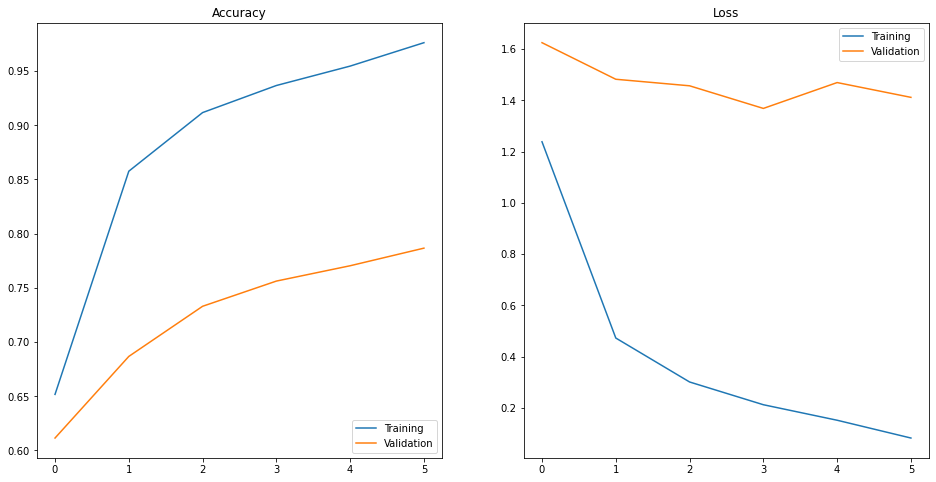

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs= len(loss)
epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='lower right')
plt.title('Accuracy')




plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()




Nous avons une accuracy de 97,48% et une loss de 0,0896.

In [17]:
# Prochain batches_images(lot d'images)..
imgs, labels = next(test_batches) 
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
#sauvegarde du modèle : model.save()  function.
model.save('best_model_dataflair4.h5')

loss of 1.1527040004730225; accuracy of 80.0000011920929%


In [18]:
batch_size =10
test_score = model.evaluate_generator(test_batches, batch_size)



print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 80.00%
[INFO] Loss:  1.2363553047180176


In [27]:
#Print the Target names



target_names = []

for key in train_batches.class_indices:

    target_names.append(key)



print(target_names)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'unknown', 'v', 'w', 'x', 'y', 'z']


### Visualisation des tests

predictions sur un ensemble de données--

F   R   I   D   D   A   A   S   D   I   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

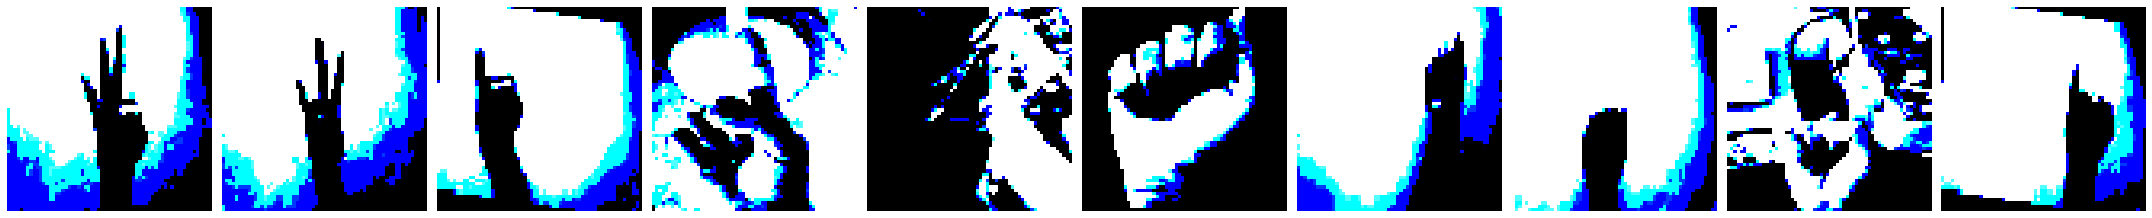

Actual labels
F   R   I   D   O   A   A   A   D   I   

In [18]:
#dictionnaire contenant les labels pour les predictions
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'unknown',22:'V',23:'W',24:'X',25:'Y', 26:'Z'}
predictions = model.predict(imgs, verbose=0)
print("predictions sur un ensemble de données--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')
plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

predictions sur un ensemble de données--

R   S   Q   unknown   Q   R   C   Y   U   unknown   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

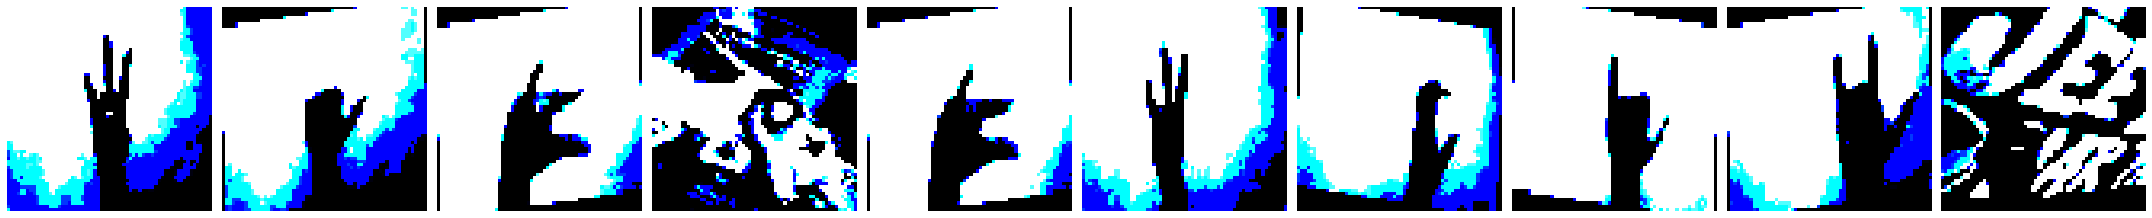

Actual labels
R   S   Q   O   Q   R   C   Y   U   O   

In [26]:
#dictionnaire contenant les labels pour les predictions
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'unknown',22:'V',23:'W',24:'X',25:'Y', 26:'Z'}
predictions = model.predict(imgs, verbose=0)
print("predictions sur un ensemble de données--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')
plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

80% des images sont reconnues sur les 2 tests, notre modèle est plutôt bon.

les "erreurs" semblent concerner plutôt des images qui ne sont pas très claires.

# Predire les gestes

Nous allons reconnaître les gestes de la main à partir d'une séquence vidéo. Pour reconnaître ces gestes nous devons d'abord retirer la région de la main seule en supprimant toutes les parties indésirables de la séquence vidéo. Après avoir segmenté la région de la main, nous déterminerons quelle est la lettre identifiée pour faire un mot

Cette étape va nous permettre de vérifier si notre modèle fonctionne en temps réel dans la vraie vie. 

2 fenêtres vont s'ouvrir :

    - une fenêtre qui propose un cadre de détection dans lequel nous devons insérer notre main 
    
    - la deuxième fenêtre qui va prédire la lettre.
    Pour un fonctionnement optimal , nous devons nous placer devant un fond uni car le modèle ne permet pas la détection automatique.

In [19]:
import numpy as np
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

Chargement de notre modèle

In [28]:
model = keras.models.load_model(r"C:\Users\utilisateur\Google Drive\microsoft_ia\Google Drive\projets\ia\Reconnaissance des signes test -officiel\best_model_dataflair4.h5")
#(background => arrière plan)
background = None
accumulated_weight = 0.5

Mise en place du dimensionnement du cadre qui permettra la prédiction de l'image (endroit qui détecte notre main )

In [29]:

# dimensions du ROI cad contour du cadre qui permet la prédiction de l'image(endroit où l'on doit mettre notre main )
ROI_top = 50
ROI_bottom = 300
ROI_right = 50
ROI_left = 350

Fonction pour calculer la moyenne pondérée accumulée en arrière-plan (pour séparer le premier plan de l'arrière-plan)
Puis nous soustrayons celle-ci des cadres qui contiennent un objet devant l'arrière plan (ou premier plan)

In [30]:
# Project: gesture-recognition, License: MIT License, OpenSource
def cal_accum_avg(frame, accumulated_weight):

    global background
    
    if background is None:
        background = frame.copy().astype("float")
        return None

    cv2.accumulateWeighted(frame, background, accumulated_weight)

##### calcul de la valeur seuil : 
la fonction va nous permettre de calculer la valeur seuil ```Thresholded``` pour chaque image et déterminer le ```contour``` grâce à la fonction ```cv2.findContours```à l'aide du segment de fonction.
En d'autres termes, s'il y a ou non une main dans le ROI.

In [31]:
# Fonction pour l'application du filtre (Thresholded)
def segment_hand(frame, threshold=25):
    global background
    
    diff = cv2.absdiff(background.astype("uint8"), frame)

    
    _ , thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)
    
          
    #Chercher les contours dans le cadre (objets du premier plan, main par exemple) …
    image, contours = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # si longueur contours list = 0, nous n'avons pas de contour

    if contours is None:
        return None 
    else:
        
        if len(contours)==0:
            return None
        else:
            # le plus grand contour est la main
            hand_segment_max_cont = max(image, key=cv2.contourArea)
        
        # retour du hand_segment_max_countour(max contour) et de l'image seuilde la main cad thresholded image of hand
    return (thresholded, hand_segment_max_cont)


### Détection de la main 

In [32]:
#ouverture de la caméra
cam = cv2.VideoCapture(0)

#Nombre de cadre
num_frames =0

#Création de la liste pour stocker les lettres prédites
lst = []


while True:
    ret, frame = cam.read()

    # stabilisation de l'image(éviter le retournement)
    
    frame = cv2.flip(frame, 1)

    frame_copy = frame.copy()

    # ROI du cadre
    roi = frame[ROI_top:ROI_bottom, ROI_right:ROI_left]

    gray_frame = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray_frame = cv2.GaussianBlur(gray_frame, (9, 9), 0)

     # Détection du Background
    if num_frames < 70:
        
        cal_accum_avg(gray_frame, accumulated_weight)
        
        # ``` cv2.putText``` permet l'affichage du texte et ne mettre aucun objet ou main dans le ROI lors de la détection de l'arrière-plan)
        cv2.putText(frame_copy, "chargement...PLEASE WAIT",
  (80, 400), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
    
    else: 
        # segmentation de la région de la main
        hand = segment_hand(gray_frame)
        
        # Vérification : détectons-nous bien la main
        if hand is not None:
            
            thresholded, hand_segment = hand

            # dessiner des contours autour de la main
            cv2.drawContours(frame_copy, [hand_segment + (ROI_right,
      ROI_top)], -1, (255, 0, 0),1)
            
            cv2.imshow("Filtre de l'image de la main", thresholded)
            # Traitement
            thresholded = cv2.resize(thresholded, (64, 64))
            thresholded = cv2.cvtColor(thresholded,
 cv2.COLOR_GRAY2RGB)
            thresholded = np.reshape(thresholded,
(1,thresholded.shape[0],thresholded.shape[1],3))
            
            pred = model.predict(thresholded)
            # Affichage de la prédiction
            cv2.putText(frame_copy, word_dict[np.argmax(pred)],
(170, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            #les lettre sont ajoutées à une liste
            lst.append(word_dict[np.argmax(pred)])
            #pause entre chaque lettre pour avoir le temps de se positionner
            sleep(4)
            #on joint les lettres selon le référentiel suivant :http://pedagogie.ac-limoges.fr/sti_si/accueil/FichesConnaissances/Sequence2SSi/co/Code_ASCII.html
            toto = "".join(lst)
           # espace
            #if cv2.waitKey(1) == 32:
                #toto += " "
                
               
            #affichage du mot détecté
            cv2.putText(frame_copy, toto, (250, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
            
            
    # Dessine le ROI du filtre
    cv2.rectangle(frame_copy, (ROI_left, ROI_top), (ROI_right,
    ROI_bottom), (255,128,0), 3)

    # incrementation du nombre d'images
    num_frames += 1

    # Afficher le cadre avec la main segmentée pour la reconnaissance
    cv2.putText(frame_copy, "Reconnaissance des signes de la main",
    (10, 20), cv2.FONT_ITALIC, 0.5, (51,255,51), 1)
    cv2.imshow("Detection", frame_copy)


    # fermer la fenêtre avec la touche Esc
    k = cv2.waitKey(1) & 0xFF

    if k == 27:
        break
        
# fermer la caméra et détruire toutes les fenêtres
cam.release()
cv2.destroyAllWindows()

In [33]:
print(lst)

['E', 'I']


In [34]:
" ".join(lst)

'E I'

la reconnaissance et l'affichage par caméra fonctionnent 

https://translate.google.com/translate?hl=fr&sl=en&u=https://data-flair.training/blogs/sign-language-recognition-python-ml-opencv/&prev=search&pto=aue

https://data-flair.training/blogs/sign-language-recognition-python-ml-opencv/

https://gogul.dev/software/hand-gesture-recognition-p1
https://translate.google.com/translate?hl=fr&sl=en&u=https://gogul.dev/software/hand-gesture-recognition-p1&prev=search&pto=aue